<a href="https://colab.research.google.com/github/Lind8/rau-numerical-methods-602CSE-2022-2023/blob/main/ERMELINDA_HYSENSHAHAJ_Homework_Numerical_Methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
import numpy as np
import matplotlib.pyplot as plt
from functools import partial
import math

In [94]:
# Test case
def f1(x):
  return x*x - 4 * x + 4

def f2(x, a, b, c, d):
  """To test this function, you need to recreate a partial function where you
  initialise the parameters a, b, c, d such that the function used with the
  bisection method takes only one parameter, x.
  
  Hint: Have a look at partial functions in Python."""
  return a*x**3 + b*x**2 + c*x + d

[20 points] QUESTION 1

Complete the implementation for the bisection method for finding the roots of a transcendal equation of the form f(x) = 0. 

In [101]:
def bisection(f, x0, x1, eps_f=0.001, eps_x=0.001, n_iter=1000):
  """
  Solves f(x)=0 with bisection method
  
    Outputs:
     xg is the root approximation
     fg is the function evaluated at final guess f(xg)
     N_eval is the number of function evaluations
    Inputs:
  
  f is the function handle to the desired function,
  xn and xp are borders of search, i.e. root brackets,
  eps_f defines maximum deviation of f(x_sol) from 0,
  eps_x defines maximum deviation from the true solution
  """
  #TODO: Check that f(x0) < 0. Raise an error otherwise.
  # Your code goes here.

  if f(x0) > 0:
    raise ValueError('Interval bound are not correct.')

  # TODO: Check that f(x1) > 0. Raise an error otherwise.
  # Your code goes here.

  if f(x1) < 0:
    raise ValueError('Interval bound are not correct.')

  # Initialization
  xg = (x1 + x0) / 2 # Initial root guess
  fg = f(xg)    # Initial function evaluation
  iter_num = 1 # We just evaluated the function
  
  # Search for root
  while (np.abs(xg - x1) > eps_x or np.abs(fg) > eps_f) and (iter_num < n_iter):
    if fg > 0:
      x1 = xg
    else:
      x0 = xg
    #TODO: Update xg, fg, and increase the iteration number.
    # Your code goes here.
    xg = (x1+x0) / 2
    fg = f(xg)
    iter_num += 1

  return xg, fg, iter_num


In [103]:
# Test your methods
# Add the code where you test your bisection implemention in this cell. 
# In your report, please show all the results from the bisection method and how
# they compare to the real solution of the equation, if it exists. In your tests,
# vary the eps_x, eps_f, n_iter parameters and show the effects of these 
# parameters on your solution accuracy.

n_iter = 10000
eps_x = 0.00000000001
eps_f = 0.00000000001

import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-100, 100, 1000)

# Function 1

# For the f1 function, is a perfect square (x-2)^2 you can not get a negative value for the f(x0), minimum is f(x0) = 0 and x0 = 2
xn = 2
xp = 5
def bisection(f1, xn, xp, esp_x, esp_f, n_iter):
  xg, fg, iter_num = bisection(f1, xn, xp, eps_x, eps_f, n_iter)

  x1, y1 = [-100, 100], [fg, fg]

  plt.plot(x, f1(x))
  plt.plot(x1, y1)
  plt.grid()
  plt.show()

  print(xg, fg, iter_num)

# Function 2

p = partial(f2, a=2, b=4, c=5, d=1) # 2x^3 + 4x^2 + 5x + 1

xn = -2
xp = 1
print (p(1))

def bisection(p, xn, xp, eps_x, eps_f, n_iter):
   xg, fg, iter_num = bisection(p, xn, xp, eps_x, eps_f, n_iter)

   x1, y1 = [-100, 100], [fg, fg]

   plt.plot(x, p(x))
   plt.plot(x1, y1)
   plt.grid()
   plt.show()

   print(xg, fg, iter_num)


12


[30 points] QUESTION 2

Implement the fixed point iteration method for finding the roots of a transcendal equation of the form f(x) = 0

Pseudocode:
```
Given an equation f(x) = 0  
Convert f(x) = 0 into the form x = g(x)  [manually]
Let the initial guess be x0  
Do  
  x_n+1= g(x_n) 
while (none of the convergence criterion C1 or C2 is met)
```

* C1. Fixing apriori the total number of iterations n_iter. 
* C2. By testing the condition  | x_n+1 - g(x_n) | (where i is the iteration number) less than some tolerance limit, say epsilon, fixed apriori.

References:
- https://math.iitm.ac.in/public_html/sryedida/caimna/transcendental/iteration%20methods/fixed-point/iteration.html

In [97]:
# TODO: Implement the fixed point method
# Your code goes here

import numpy as np
import matplotlib.pyplot as plt

def fixed_point(f, x, eps,C1):
  roots = []
  C2 = f(x)
  x = C2
  while np.abs(C2 - f(x)) > eps and C1 > 0:
    roots.append(C2)
    C2 = f(x)
    x = C2
    C1 = C1 - 1
  return C2, roots

def  f(x):
  return (x*x*x+1) / 3
fixed_point(f, 0.5, 0.00001, 1000)


(0.3473027741103672,
 [0.375, 0.3509114583333333, 0.3477369446629359, 0.3473495643546683])

In [98]:
# Test your methods
# Add the code where you test your fixed_point implemention in this cell. 
# In your report, please show all the results from the bisection method and how
# they compare to the real solution of the equation, if it exists. In your tests,
# vary the function parameters and show the effects of these 
# parameters on your solution accuracy.

[50 points] QUESTION 3

Implement the Newton Raphson method for finding the roots of a transcendal equation of the form f(x) = 0

Pseudocode:

```
1. Guess a solution x0.
2. Repeat until convergence conditions C1 or C2 are met
2.1. Compute f(x0).
2.2. Compute f'(x0) [first derivate of f]
2.3. Update x0 using the equation below:
      x_n+1 = x_n - f(x_n) / f'(x_n)
```

* C1. Total number of iteration exceeds n_iter.
* C2. |x_n+1 - x_n| < eps, where eps is a preset tolerance and n is the current iteration (step).

References:
- https://brilliant.org/wiki/newton-raphson-method/

In [99]:
# TODO: Implement the newton method
# Your code goes here
def newton_raphson(f, df, x0, eps, n_iter = 1000):
  if abs(f(x0)) < eps or n_iter == 0:
      return x0
  else:
      return newton_raphson(f, df, x0 - f(x0)/df(x0), eps, n_iter - 1)


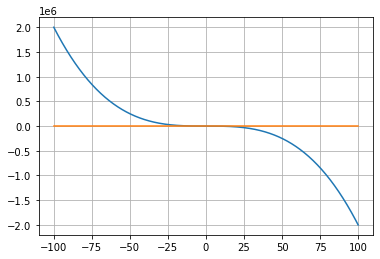

-1.1102230246251565e-16 0.721406032674848


In [100]:
# Test your methods
# Add the code where you test your newton implemention in this cell. 
# In your report, please show all the results from the bisection method and how
# they compare to the real solution of the equation, if it exists. In your tests,
# vary the parameters and show the effects of these 
# parameters on your solution accuracy.

n_iter = 10000
eps = 0.00000000001

import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-100, 100, 1000)

def f(x):
    res = np.cos(x)-2*x**3
    return res


def dfdx(x):
    res = -np.sin(x)-6*x**2
    return res

xn = 1

xg = newton_raphson(f, dfdx, xn, eps, n_iter)

x1, y1 = [-100, 100], [f(xg), f(xg)]

plt.plot(x, f(x))
plt.plot(x1, y1)
plt.grid()
plt.show()

print(f(xg), xg)
